In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
def calculaCDF(df, coluna, titulo = 'CDF of Mean Toxicity for Each Platform'):
    plt.figure(figsize=(10, 6))
    unique_item = df[coluna].unique()
    
    for unique in unique_item:
        # Select rows for the current platform
        platform_data = df[df[coluna] == unique]
        # Calculate CDF
        x = np.sort(platform_data['meanToxicity'])
        y = np.arange(1, len(x) + 1) / len(x)
        # Plot CDF
        plt.plot(x, y, label=unique)
    
    plt.xlabel('Mean Toxicity')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
semAtaque = pd.read_csv('livreAtaque.csv')
ataque = pd.read_csv('sofreuAtaque.csv')

dfJogos = pd.read_csv('Jogos.csv')
dfUsuarios = pd.read_csv('data-sets/game_reviews_users.csv')
dfUsuarios.dropna()

# Exibir a contagem de valores nulos por coluna
dfJogos.dropna(subset=['plataforms'], inplace=True)
dfJogos.fillna(0, inplace=True)

C:\Users\cotoq\AppData\Local\Temp\ipykernel_8956\4211751349.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsuarios = pd.read_csv('data-sets/game_reviews_users.csv')


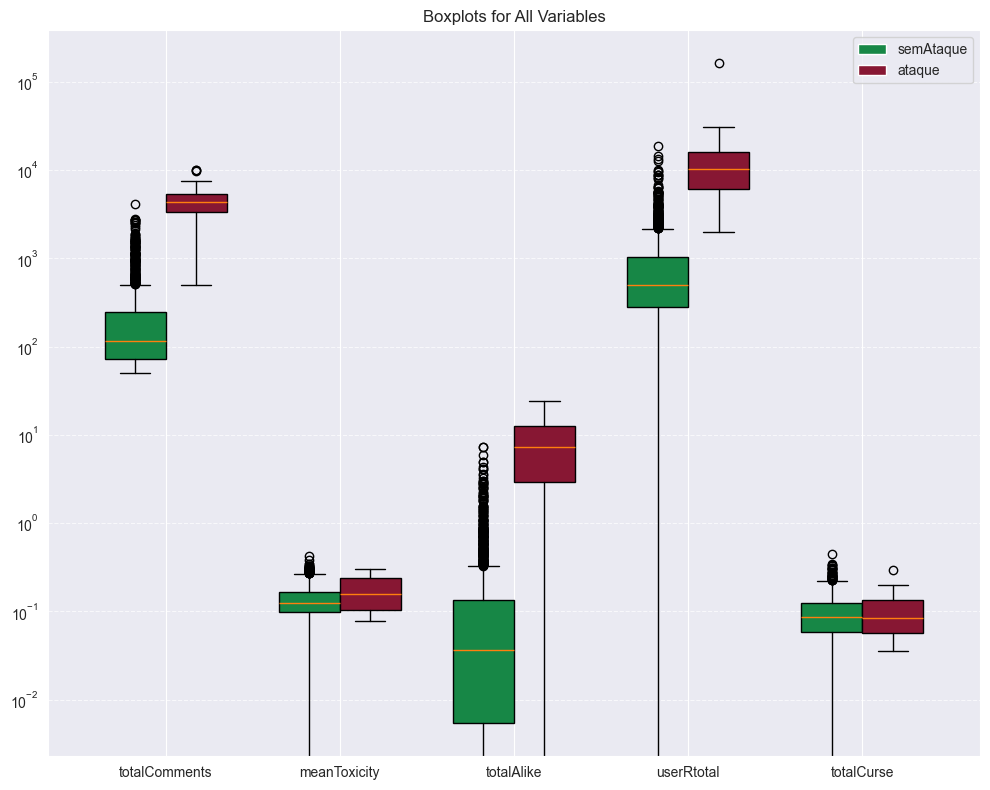

In [22]:
variables = ['totalComments', 'meanToxicity', 'totalAlike', 'userRtotal', 'totalCurse']

plt.figure(figsize=(10, 8))

positions = list(range(len(variables)))
width = 0.35

colors = ['#178746', '#871733']


for i, variable in enumerate(variables):
    semAtaque_data = semAtaque[variable]
    ataque_data = ataque[variable]
    
    semAtaque_positions = [p - width/2 for p in positions]
    ataque_positions = [p + width/2 for p in positions]
    
    plt.boxplot(semAtaque_data, positions=[semAtaque_positions[i]], patch_artist=True, boxprops=dict(facecolor=colors[0]), widths=width)
    plt.boxplot(ataque_data, positions=[ataque_positions[i]], patch_artist=True, boxprops=dict(facecolor=colors[1]), widths=width)

plt.xticks(positions, variables)
plt.title('Boxplots for All Variables')
plt.yscale('log')  # Set y-axis to log scale
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines

# Create legend
legend_elements = [Patch(facecolor=colors[0], label='semAtaque'), Patch(facecolor=colors[1], label='ataque')]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

In [23]:
dfJogos['platform'] = dfJogos['plataforms'].str.split(', ')
dfJogos = dfJogos[dfJogos['meanToxicity'] > 0]
# Explode the DataFrame to separate rows for each platform
dfPlatform = dfJogos.explode('platform')
dfPlatform['platform'] = dfPlatform['platform'].str.replace(r"[\[\]']", "", regex=True)
# Get unique platforms
unique_platforms = dfPlatform['platform'].unique()
print(unique_platforms)

['PlayStation 4' 'Nintendo Switch' 'PC' 'Xbox Series X' 'PlayStation 3'
 'PlayStation Vita' 'Wii U' 'Xbox One' 'Xbox 360' 'PlayStation 2'
 'Game Boy Advance' 'GameCube' 'Xbox' 'DS' 'iOS (iPhone/iPad)' 'PSP'
 'PlayStation' 'PlayStation 5' '3DS' 'Wii' 'Nintendo 64' 'Dreamcast']


In [24]:
platform_mapping = {
    'PlayStation 4': 'PlayStation',
    'PlayStation 3': 'PlayStation',
    'PlayStation 2': 'PlayStation',
    'PSP': 'PlayStation',
    'PlayStation Vita': 'PlayStation',
    'PlayStation': 'PlayStation',
    'PlayStation 5': 'PlayStation',
    
    'Xbox Series X': 'Xbox',
    'Xbox One': 'Xbox',
    'Xbox 360': 'Xbox',
    'Xbox': 'Xbox',

    '#iOS (iPhone/iPad)': 'Mobile',
    'PC': 'PC',

    'GameCube': 'Nintendo',
    'Wii U': 'Nintendo',
    'Game Boy Advance': 'Nintendo',
    'DS': 'Nintendo',
    'Nintendo Switch': 'Nintendo',
    '3DS': 'Nintendo',
    'Wii': 'Nintendo',
    'Nintendo 64': 'Nintendo',
    
    '#Dreamcast': 'Sega'
}
dfPlatform['platform'] = dfPlatform['platform'].replace(platform_mapping)

In [25]:
print(dfPlatform['platform'].value_counts())

platform
PlayStation          9508
PC                   7991
Xbox                 6331
Nintendo             6227
iOS (iPhone/iPad)    1453
Dreamcast             143
Name: count, dtype: int64


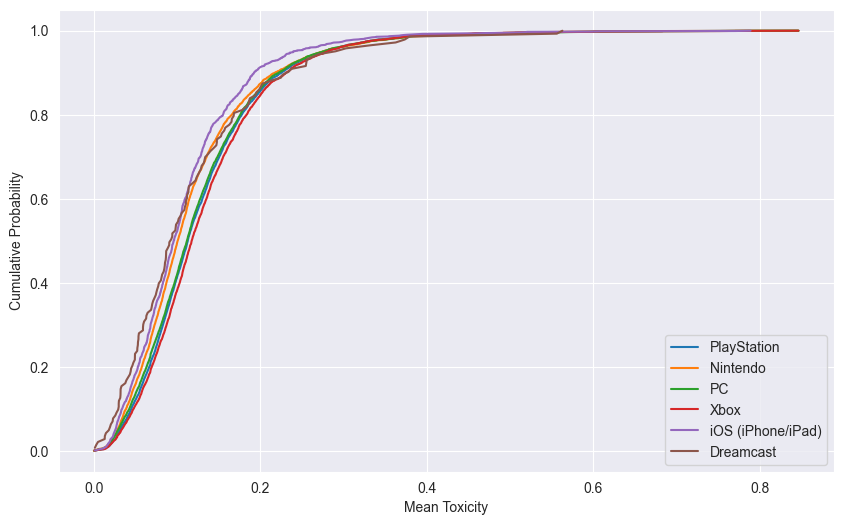

In [26]:
calculaCDF(dfPlatform, 'platform')

In [27]:
print(dfJogos['Genre'].unique())

['["Horizontal Shoot-\'Em-Up"]' "['3D Platformer']" "['Metroidvania']"
 "['Defense']" "['Team Sports']" "['2D Platformer']" "['Action RPG']"
 "['Auto Racing']" "['Light Gun']" "['Survival']" "['Tycoon']"
 "['Action Puzzle']" "['Action Adventure']" "['Aircraft Sim']"
 "['Trivia']" "['Adventure']" "['Puzzle']" "['JRPG']" "['2D Fighting']"
 "['Turn-Based Tactics']" "['Point-and-Click']" "['Western RPG']"
 "['Management']" "['Third-Person Adventure']" "['Rhythm']"
 "['Visual Novel']" "['MMORPG']" "['Real-Time Strategy']"
 "['Virtual Pet']" "['Open-World Action']" "['Board']"
 '["Top-Down Shoot-\'Em-Up"]' "['Party']" "['FPS']" "['Basketball Sim']"
 "['Compilation']" "['Aircraft Combat Sim']" "['4X Strategy']"
 "['Auto Racing Sim']" "['Virtual Life']" "['Space Combat Sim']"
 "['Sandbox']" "['Tactical FPS']" "['Strategy']" "['Arcade']"
 "['Marine Combat Sim']" "['First-Person Adventure']" "['Golf']" "['RPG']"
 "['Application']" "['Train Sim']" "['Cricket']" '["2D Beat-\'Em-Up"]'
 "['Third Per

In [28]:
#media de toxicidade, conta quantos comentários tóxicos, barra
genre_mapping = {
    'Action': ['Action RPG', 'Action Adventure', 'Action', 'Linear Action Adventure', 'Roguelike', "2D Beat-'Em-Up",'3D Fighting', '2D Fighting', "3D Beat-'Em-Up"],
    'Adventure': ["Adventure", 'Adventure', 'Point-and-Click', 'Third-Person Adventure', 'First-Person Adventure', 'Text Adventure', 'Metroidvania', '3D Platformer', 'Plataform', '2D Platformer'],
    'Shooter': ['Horizontal Shoot-Em-Up', "Horizontal Shoot-\'Em-Up", 'Top-Down Shoot-Em-Up', 'FPS (First-Person Shooter)', 'Tactical FPS', 'Third Person Shooter', 'Tactical Third Person Shooter', 'Rail Shooter', 'Light Gun', "Vertical Shoot-'Em-Up", "Top-Down Shoot-'Em-Up", 'FPS'],
    'Sports': ['Team Sports', 'Basketball Sim', 'Football Sim', 'Biking', 'Combat Sport', 'Soccer Management', 'Golf', 'Cricket', 'Tennis', 'Soccer', 'Hockey', 'Skating', 'Basketball', 'Football', 'Hockey Sim', 'Bowling', 'Surfing', 'Baseball', 'Rugby', 'Volleyball', 'Soccer Sim', 'Golf Sim', 'Skiing', 'Soccer Sim', 'Hockey Sim', 'Billiards', 'Future Sport', 'Individual Sports', 'Sports', 'Exercise'],
    'Racing': ['Auto Racing', 'Auto Racing Sim', 'Arcade Racing', 'Future Racing', 'Racing', 'Racing Sim', 'Horse Racing', 'Space Combat Sim', 'Baseball Sim'],
    'Simulation': ['Management', 'Virtual Pet', 'Open-World Action', 'Space Sim', 'Marine Sim', 'Train Sim', 'Aircraft Sim', 'Vehicle Sim', 'Marine Combat Sim', 'Aircraft Combat Sim', 'Vehicle Combat Sim'],
    'Strategy': ['Real-Time Strategy', 'Turn-Based Tactics', 'Turn-Based Strategy', 'Command RTS', 'Real-Time Tactics', '4X Strategy','Strategy', 'Tycoon'],
    'Puzzle': ['Puzzle', 'Stacking Puzzle', 'Logic Puzzle', 'Matching Puzzle', 'Pinball', 'Trivia', 'Action Puzzle'],
    'Role-Playing Game (RPG)': ['JRPG (Japanese Role-Playing Game)', 'Western RPG', 'RPG', 'Trainer RPG', 'MMORPG', 'Virtual Career', 'JRPG'],
    'Miscellaneous': ['Survival', 'Party', 'Arcade', 'Dancing', 'Fishing', 'Exercise' 'Billiards', 'Wrestling', 'Athletics', 'Visual Novel', 'Rhythm', 'Card Battle', 'Artillery', 'Hunting', 'Gambling', 'Hidden Object','Edutainment', 'Simulation', 'Board', 'Defense', 'Virtual Life', 'Compilation', 'Sandbox', 'Application', 'Miscellaneous', 'MOBA'],
}

# Aplicar o mapeamento dos gêneros de jogos para categorias mais amplas
def map_genre(genres):
    for genre in eval(genres):
        for category, subgenres in genre_mapping.items():
            if genre in subgenres:
                return category
    return genres
dfGenre = dfJogos
dfGenre['Genre'] = dfJogos['Genre'].apply(map_genre)

In [29]:
print(dfGenre['Genre'].value_counts())

Genre
Action                     2360
Adventure                  2041
Miscellaneous              1727
Shooter                    1404
Strategy                   1274
Role-Playing Game (RPG)     954
Racing                      726
Simulation                  667
Sports                      539
Puzzle                      490
Name: count, dtype: int64


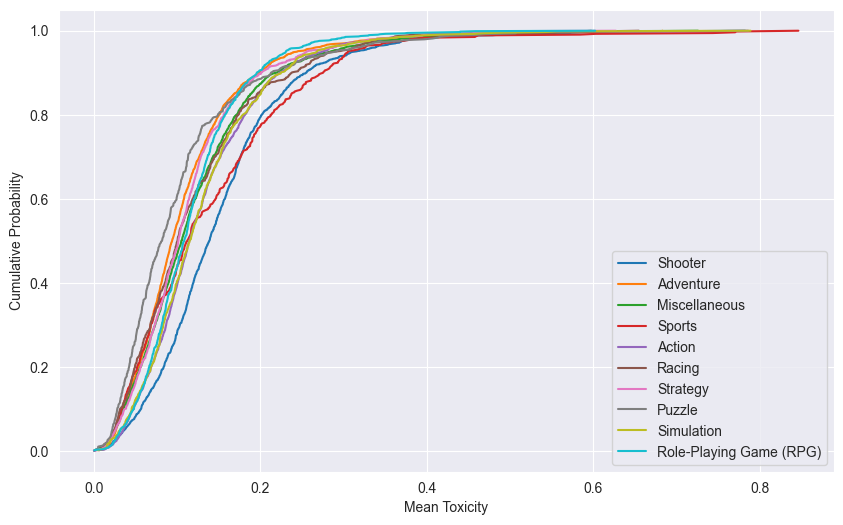

In [30]:
calculaCDF(dfGenre, 'Genre')

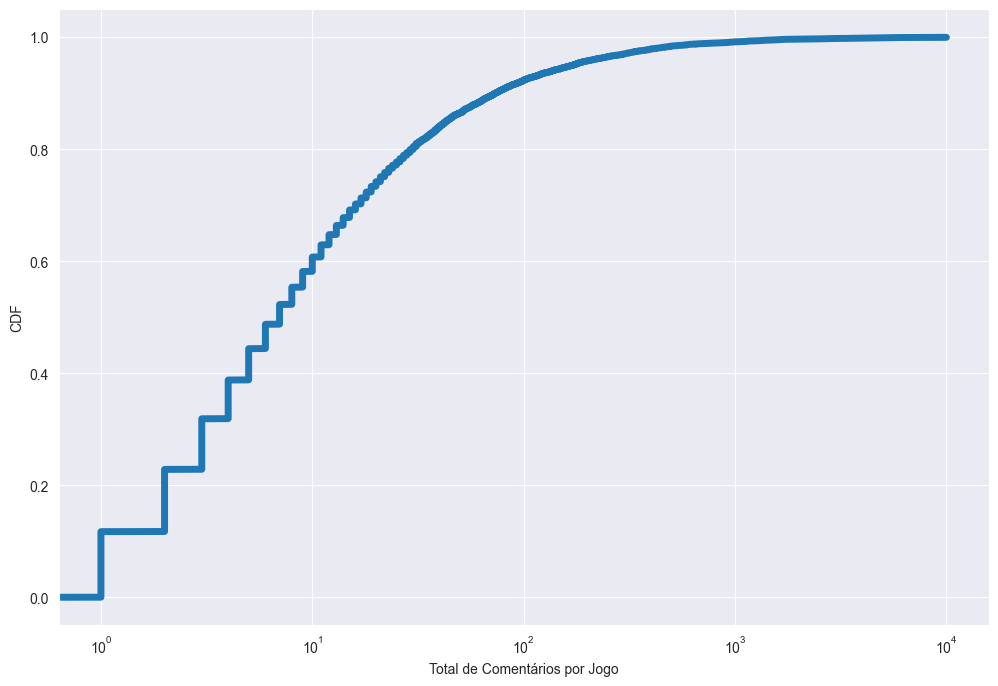

In [31]:
dfJogos_sorted = dfJogos.sort_values(by='totalComments')

# Calcular a CDF
n = len(dfJogos_sorted)
cdf = np.arange(1, n + 1) / n

# Plotar a CDF
plt.figure(figsize=(12, 8))
plt.plot(dfJogos_sorted['totalComments'], cdf, linewidth=5, linestyle='-')
plt.xscale('log')  # Define o eixo X em escala logarítmica
plt.xlabel('Total de Comentários por Jogo')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

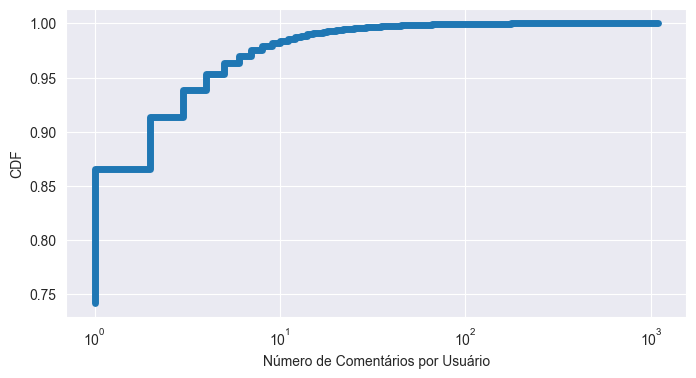

In [32]:

# Contar quantos comentários cada usuário fez
user_counts = dfUsuarios['user'].value_counts()

# Calcular a distribuição cumulativa
cdf = user_counts.value_counts(normalize=True).sort_index().cumsum()

# Plotar a CDF
plt.figure(figsize=(8, 4))
cdf.plot(drawstyle='steps-pre', linewidth=5)
plt.xscale('log')
plt.xlabel('Número de Comentários por Usuário')
plt.ylabel('CDF')
plt.grid(True)
plt.show()